##### EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

#### Name : Y.L.A. Epa

#### Index Number : 210156U

#### Github Link : https://github.com/YasodaLAE/Image_Processing_Exercise

Question 1

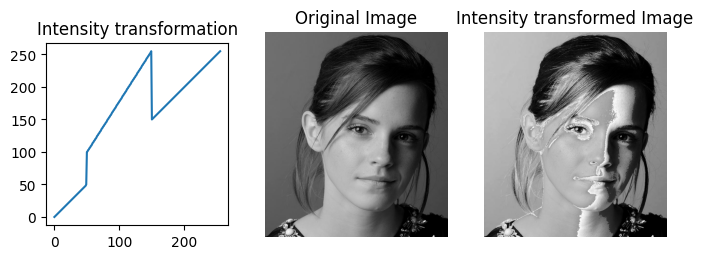

In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(150,255,106)
t = np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)
assert len(t)==256

g = cv.LUT(img,t)
fig, ax = plt.subplots(1,3,figsize=(8,8))
ax[0].plot(t), ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformed Image")	
plt.show()


Question 2

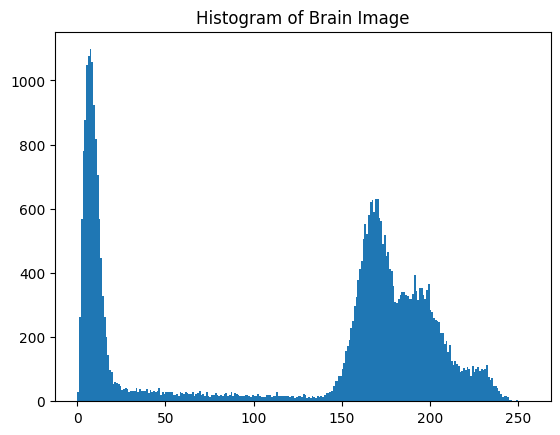

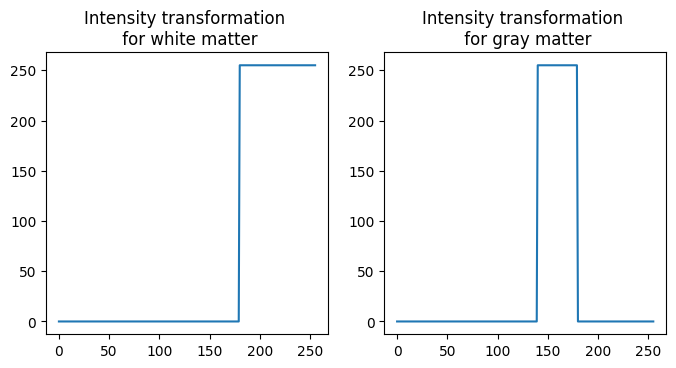

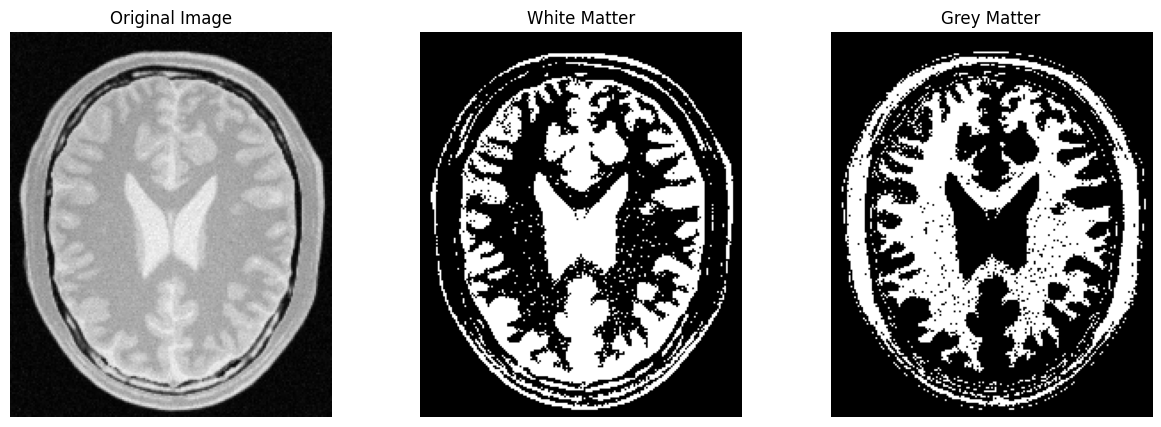

In [40]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 
 
f = cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE) 
assert f is not None 

t1 = np.zeros(180) 
t2 = 255*np.ones(76) 
t = np.concatenate((t1,t2),axis=0).astype(np.uint8) 
assert len(t)==256 

s1 = np.zeros(140) 
s2 = 255*np.ones(40) 
s3 = np.zeros(76) 
s = np.concatenate((s1,s2,s3),axis=0).astype(np.uint8) 
assert len(s)==256 

g = cv.LUT(f,t) 
h = cv.LUT(f,s) 

plt.hist(f.ravel(), 256, [0, 256])
plt.title("Histogram of Brain Image")
plt.show()


fig, ax = plt.subplots(1,2,figsize=(8,8)) 
ax[0].plot(t), ax[0].set_aspect('equal'), ax[0].set_title("Intensity transformation \n for white matter")
ax[1].plot(s), ax[1].set_aspect('equal'), ax[1].set_title("Intensity transformation \n for gray matter")
plt.show()

plt.figure(figsize=(15, 5))
# Plot the results
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.title('White Matter')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.title('Grey Matter')
plt.show()



Question 3

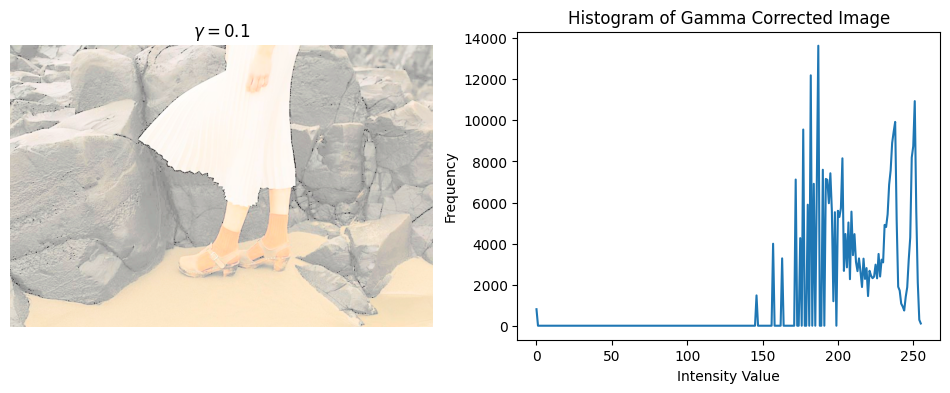

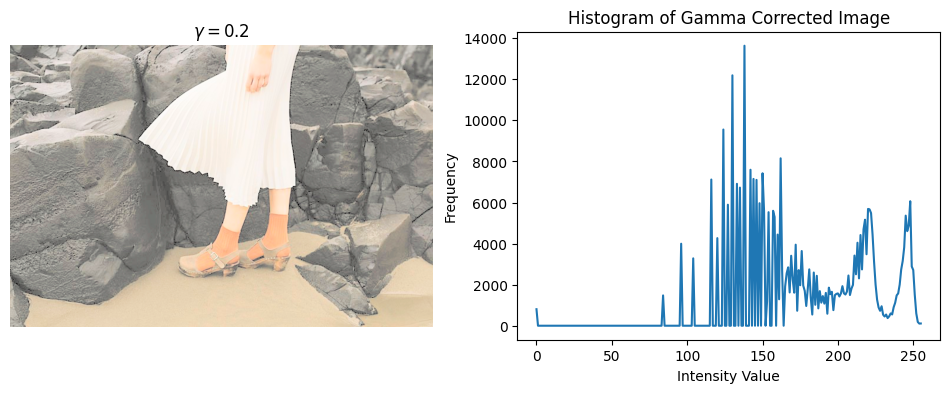

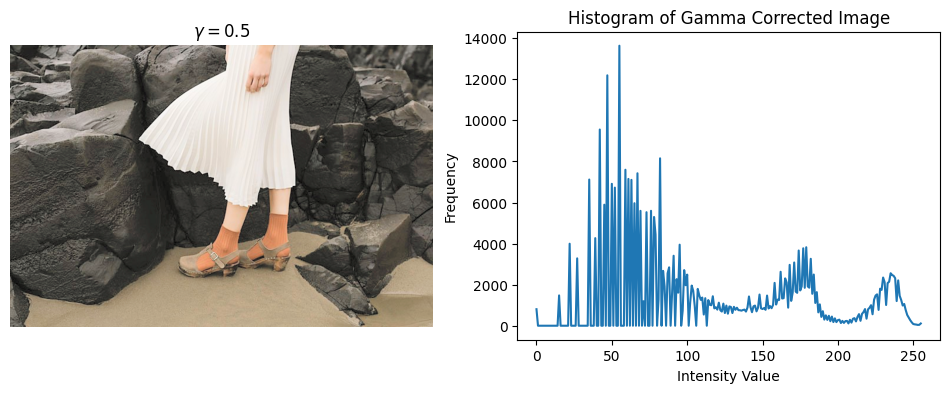

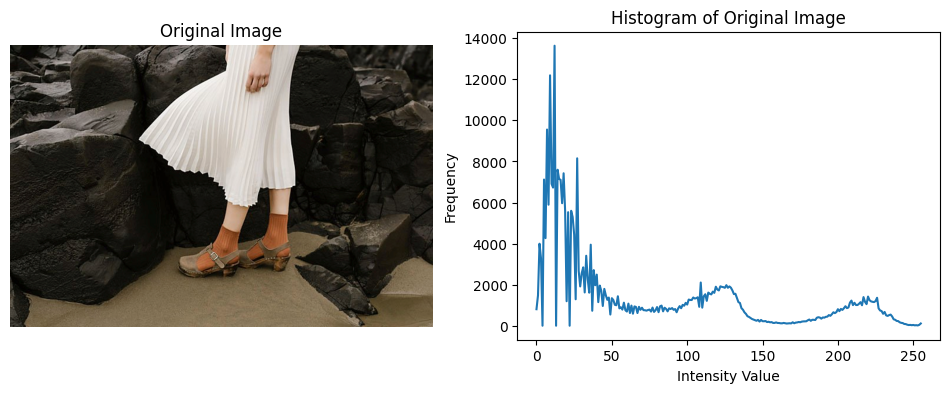

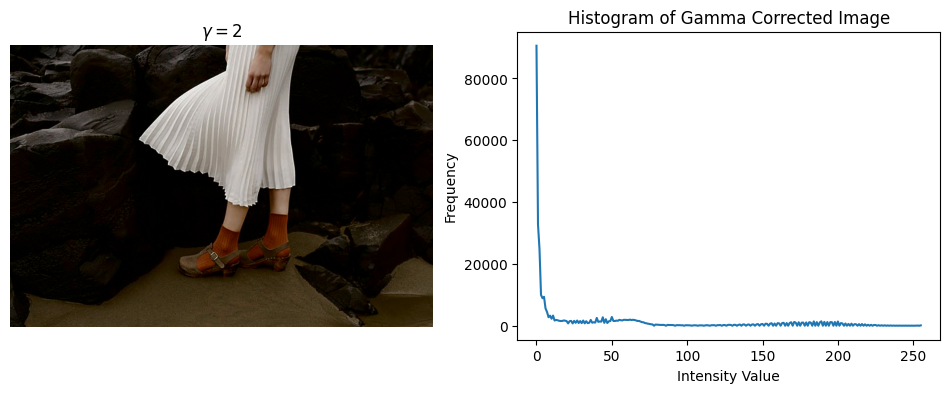

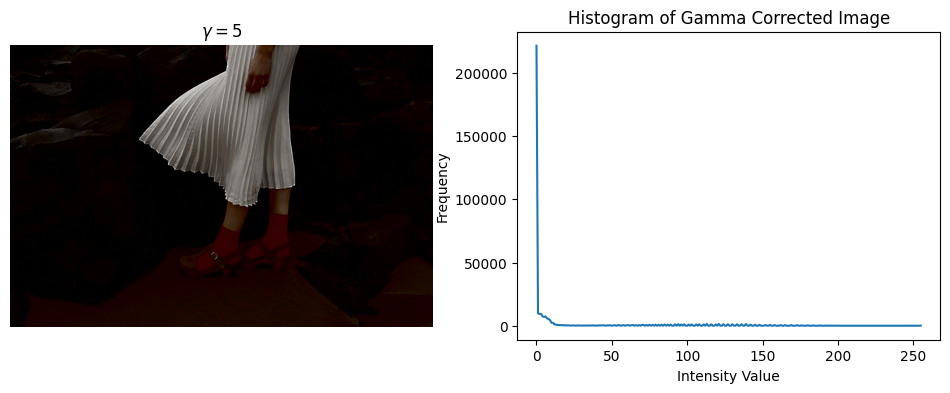

In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gammas = [0.1, 0.2, 0.5, 1, 2, 5]
img = cv.imread("highlights_and_shadows.jpg") 
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB)) 

for i, gamma in enumerate(gammas):
    t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)
    g = cv.LUT(L, t)
    corrected_img = cv.merge([g, a, b]) 

    hist = cv.calcHist([corrected_img], [0], None, [256], [0, 256])
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB))
    if gamma==1:
        ax[0].set_title('Original Image')
    else:
        ax[0].set_title(r'$\gamma = {gamma}$'.format(gamma=gamma))
    ax[0].axis('off')
    ax[1].plot(hist)
    if gamma==1:
        ax[1].set_title('Histogram of Original Image')
    else:
        ax[1].set_title('Histogram of Gamma Corrected Image')
    ax[1].set_xlabel('Intensity Value')
    ax[1].set_ylabel('Frequency')
    plt.show()



0.1, 0.2, 0.5, 1, 2, 5 values are taken for gamma. When gamma is 1, the original image is the transformed image. When gamma value is decreasing, it increases the brighness of the image. When the gamma value is greater than 1 and increasing it reduces the brightness of the original image. Plotted histograms also show this. When images get darker, the histogram values moves to the left and when it gets light, the histogram moves to right.

Question 4

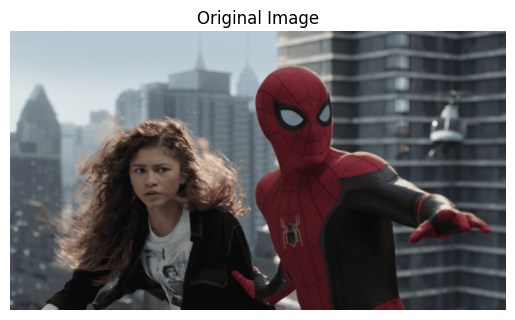

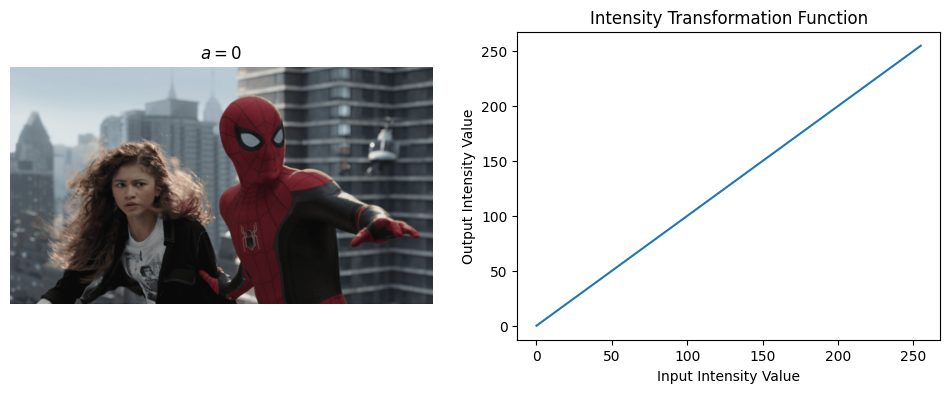

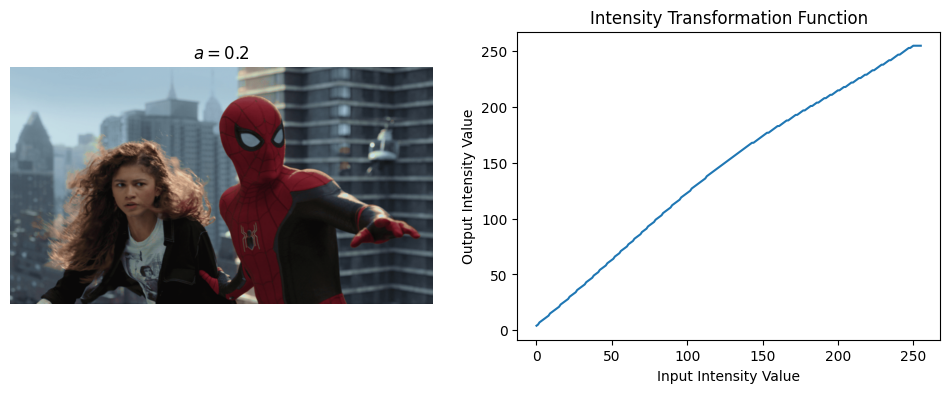

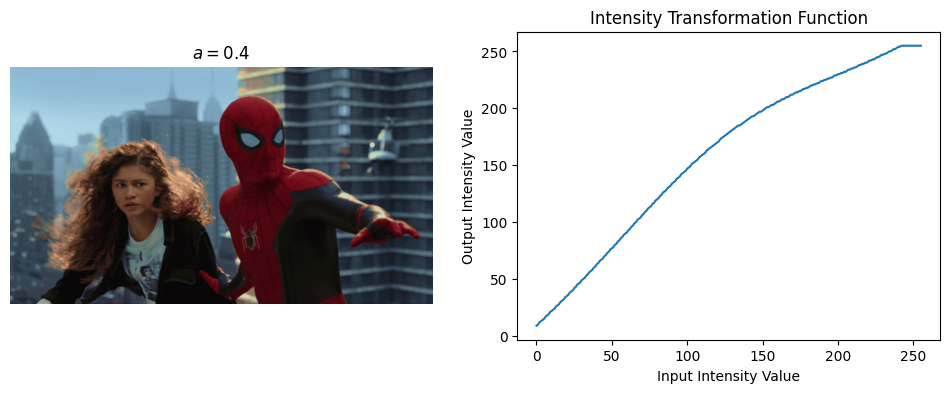

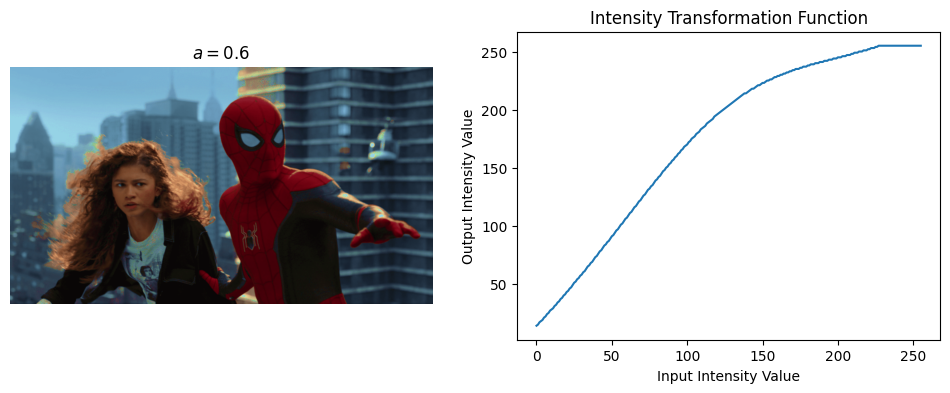

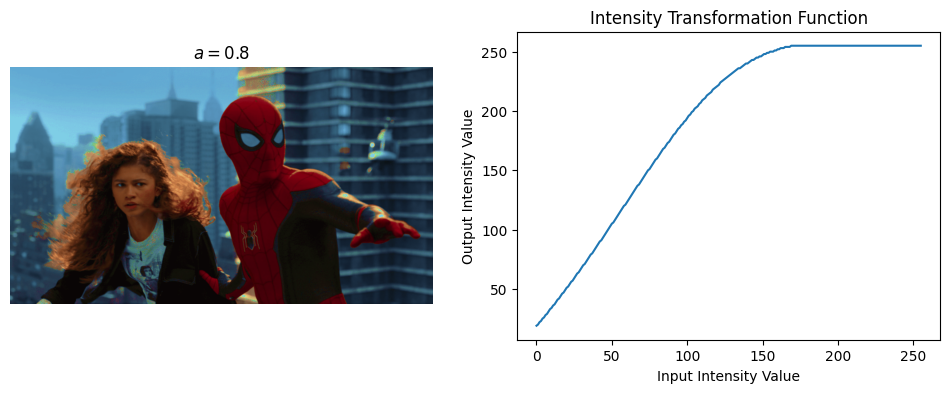

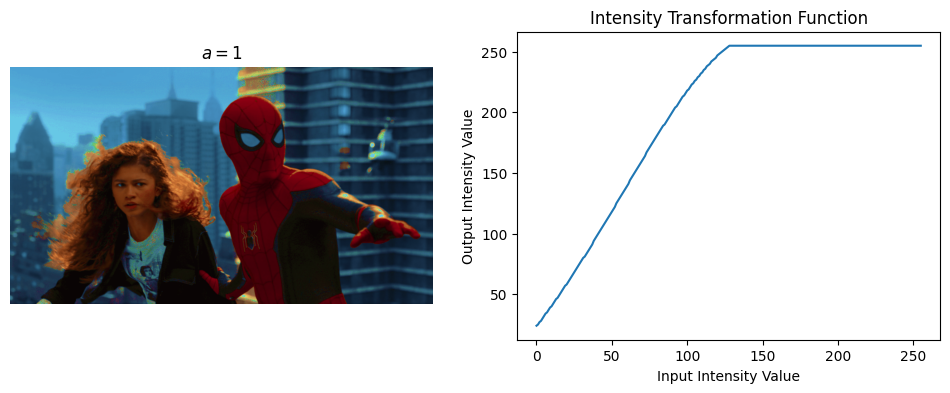

In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("spider.png")
assert img is not None
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, saturation, value= cv.split(img_hsv) 

sigma = 70
a_list = [0,0.2,0.4,0.6,0.8,1]

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

for a in a_list:
    saturation_transformed = np.clip(saturation + a * 128 * np.exp(-((saturation - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)
    vibrant_img = cv.merge([hue, saturation_transformed, value])
    vibrant_img = cv.cvtColor(vibrant_img, cv.COLOR_HSV2BGR)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].imshow(cv.cvtColor(vibrant_img, cv.COLOR_BGR2RGB))
    ax[0].set_title(r'$a = {a}$'.format(a=a))
    ax[0].axis('off')

    x_values = np.arange(0, 256)
    y_values = np.clip(x_values + a * 128 * np.exp(-((x_values - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)
    ax[1].plot(x_values, y_values)
    ax[1].set_title('Intensity Transformation Function')
    ax[1].set_xlabel('Input Intensity Value')
    ax[1].set_ylabel('Output Intensity Value')

    plt.show()

For a=0.6, we get a visually pleasing output.

Question 5

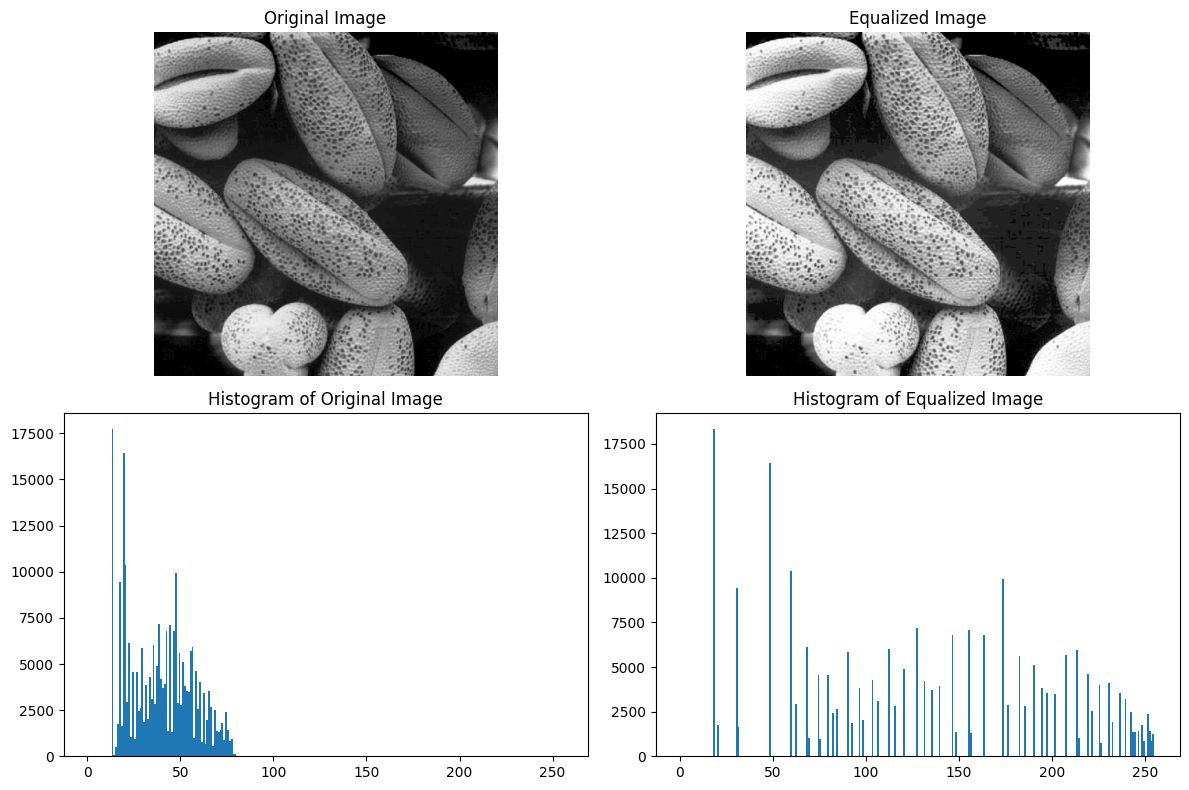

In [43]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("shells.tif")
assert img is not None

original_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

hist, bins = np.histogram(original_image.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * 255 / cdf[-1]
equalized_image = np.interp(original_image.flatten(), bins[:-1], cdf_normalized)
equalized_image = equalized_image.reshape(original_image.shape).astype(np.uint8)

 
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].imshow(original_image, cmap='gray')   
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(equalized_image, cmap='gray')   
ax[0, 1].set_title("Equalized Image")
ax[0, 1].axis('off')

ax[1, 0].hist(original_image.ravel(), bins=256, range=[0, 256]) # Histogram of Original Image
ax[1, 0].set_title("Histogram of Original Image")

ax[1, 1].hist(equalized_image.ravel(), bins=256, range=[0, 256]) # Histogram of Equalized Image
ax[1, 1].set_title("Histogram of Equalized Image")

plt.tight_layout()
plt.show()


Question 6

(a)

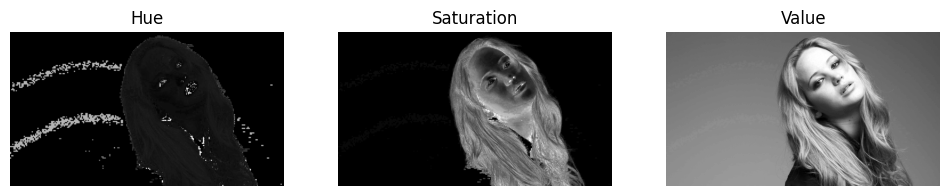

In [44]:
# (a)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("jeniffer.jpg")
assert img is not None
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, saturation, value= cv.split(img_hsv) 

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(hue, cmap='gray')
ax[0].set_title("Hue")
ax[0].axis('off')

ax[1].imshow(saturation, cmap='gray')
ax[1].set_title("Saturation")
ax[1].axis('off')

ax[2].imshow(value, cmap='gray')
ax[2].set_title("Value")
ax[2].axis('off')

plt.show()

(b) Appropriate plane is 'saturation' plane

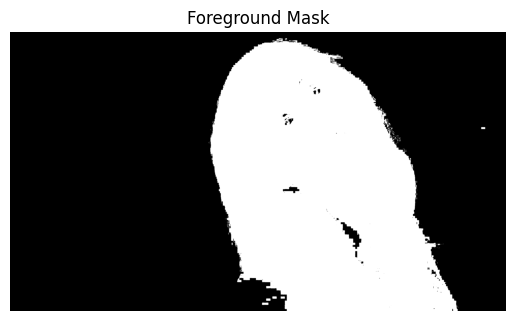

In [45]:
# (b)

_, mask = cv.threshold(saturation, 11, 255, cv.THRESH_BINARY)  # Adjust threshold value as needed

# Display the binary mask
plt.imshow(mask, cmap='gray')
plt.title("Foreground Mask")
plt.axis('off')
plt.show()


(c)

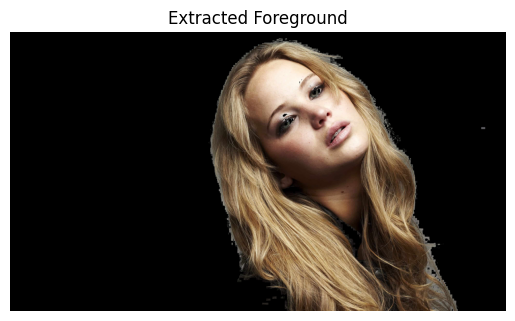

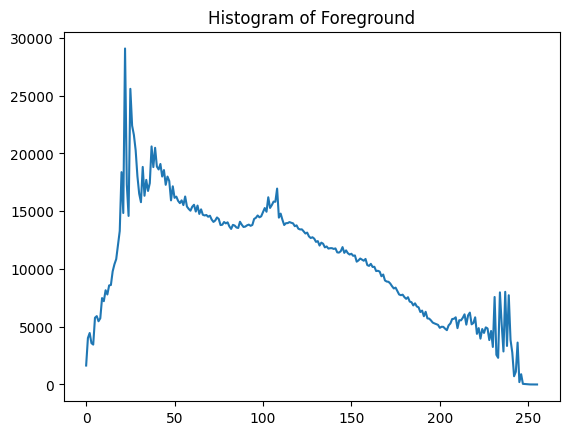

In [46]:
# Use bitwise_and to extract the foreground
foreground = cv.bitwise_and(cv.cvtColor(img, cv.COLOR_BGR2RGB), cv.cvtColor(img, cv.COLOR_BGR2RGB), mask=mask)

# Display the foreground
plt.imshow(foreground)
plt.title("Extracted Foreground")
plt.axis('off')
plt.show()

foreground_converted = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)
# Compute the histogram of the foreground
hist = cv.calcHist([foreground_converted], [0], mask, [256], [0, 256])

# Plot the histogram
plt.plot(hist)
plt.title("Histogram of Foreground")
plt.show()


(d)

In [47]:
# Compute the cumulative sum of the histogram
cdf = hist.cumsum()

(e)

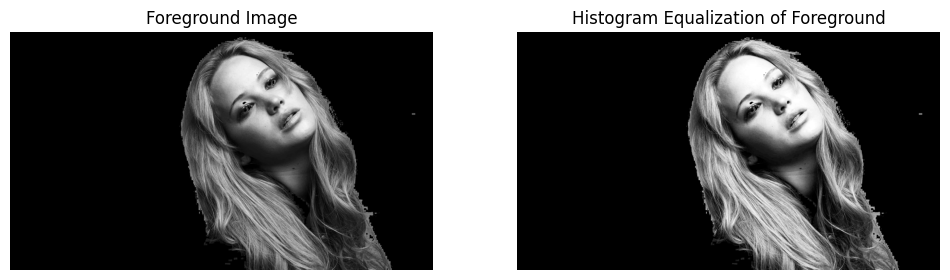

In [53]:
M, N = foreground_converted.shape
L = 256

t = np.zeros(256, dtype=np.uint8)
cdf_min = cdf.min()
cdf_max = cdf.max()

t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
g = t[foreground_converted]

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(foreground_converted, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Foreground Image')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray')
ax[1].set_title('Histogram Equalization of Foreground')
ax[1].axis('off')
plt.show()

(f)

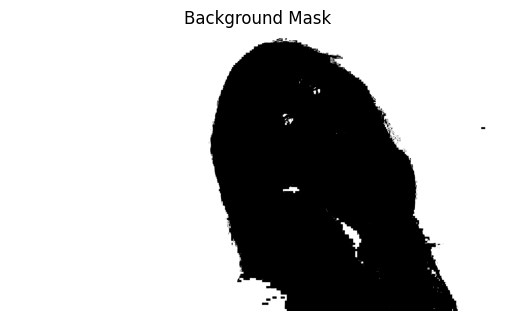

In [54]:
background_mask = cv.bitwise_not(mask)
# Display the binary mask
plt.imshow(background_mask, cmap='gray')
plt.title("Background Mask")
plt.axis('off')
plt.show()

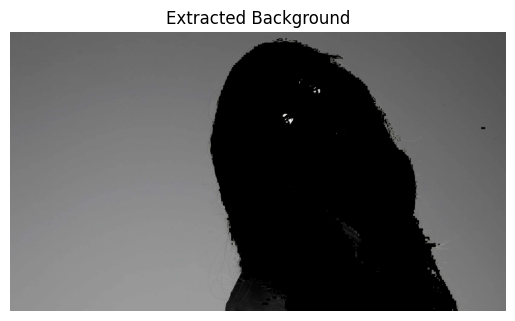

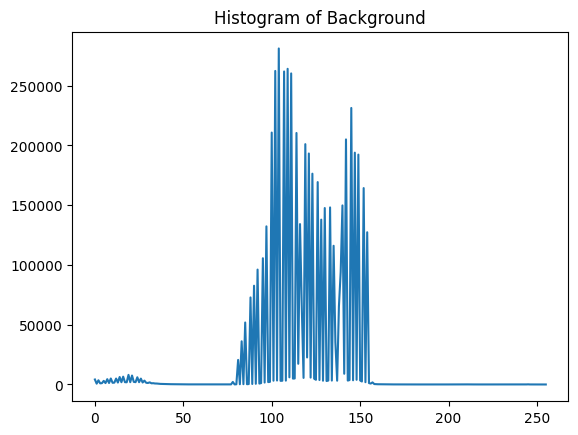

In [56]:
# Use bitwise_and to extract the background
background = cv.bitwise_and(cv.cvtColor(img, cv.COLOR_BGR2RGB), cv.cvtColor(img, cv.COLOR_BGR2RGB), mask=background_mask)

# Display the foreground
plt.imshow(background)
plt.title("Extracted Background")
plt.axis('off')
plt.show()

background_converted = cv.cvtColor(background, cv.COLOR_BGR2GRAY)
# Compute the histogram of the foreground
hist_back = cv.calcHist([background_converted], [0], background_mask, [256], [0, 256])

# Plot the histogram
plt.plot(hist_back)
plt.title("Histogram of Background")
plt.show()


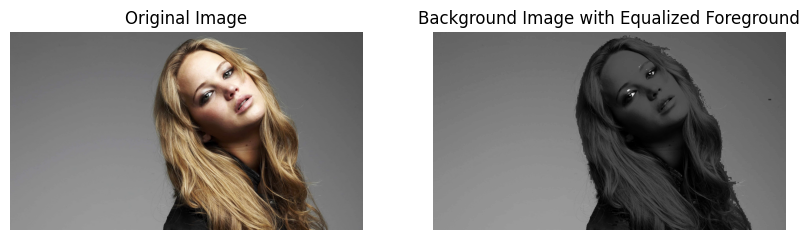

In [68]:
result = cv.add(g, cv.cvtColor(background, cv.COLOR_BGR2GRAY))

# Display the original and final images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(result, cmap='gray')
ax[1].set_title("Background Image with Equalized Foreground")
ax[1].axis('off')

plt.show()

Question 7

(a)

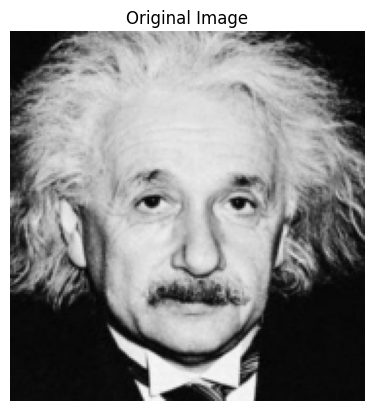

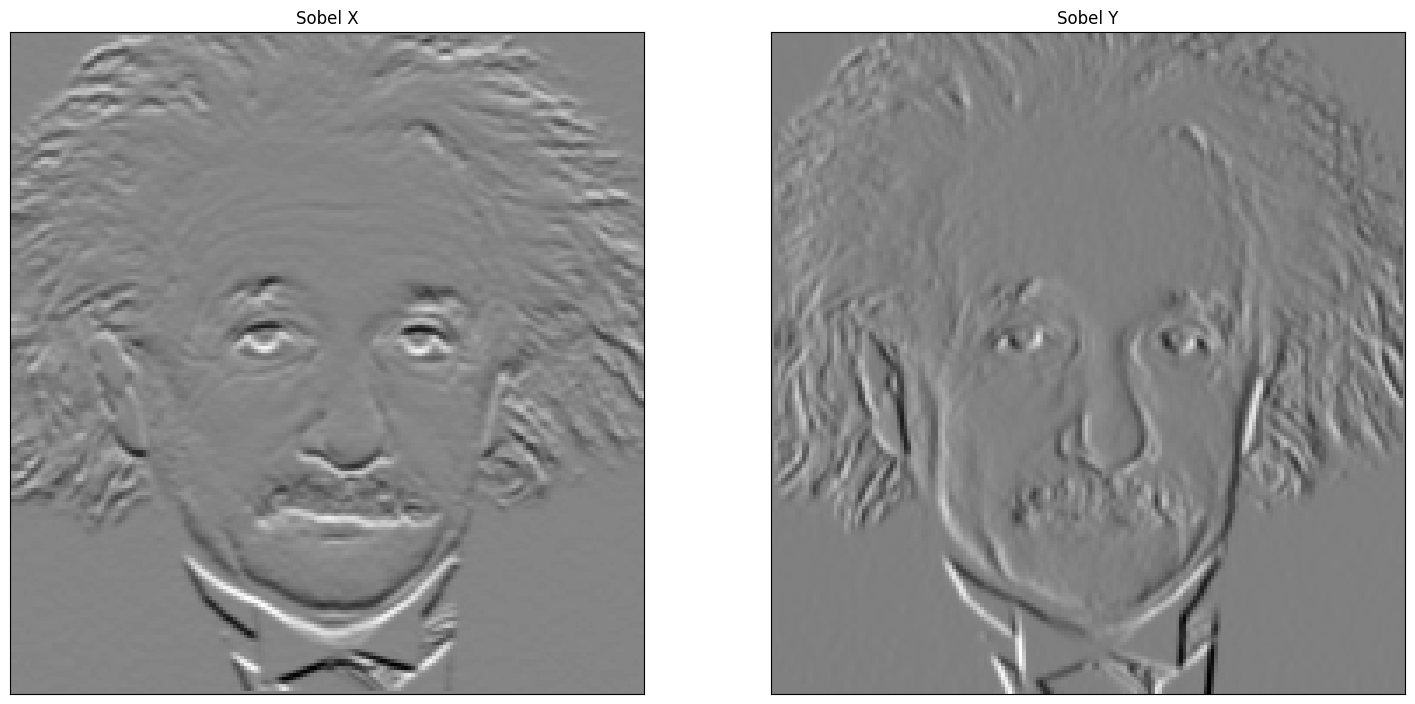

In [72]:
# (a)
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

im_x = cv.filter2D(im, cv.CV_64F, sobel_x)
im_y = cv.filter2D(im, cv.CV_64F, sobel_y)

plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

(b)

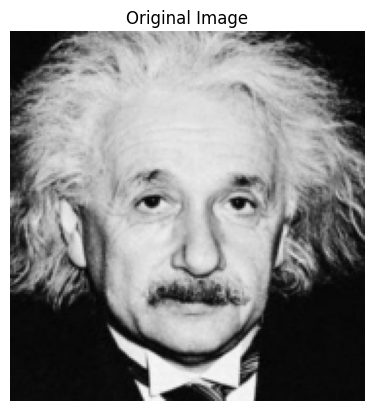

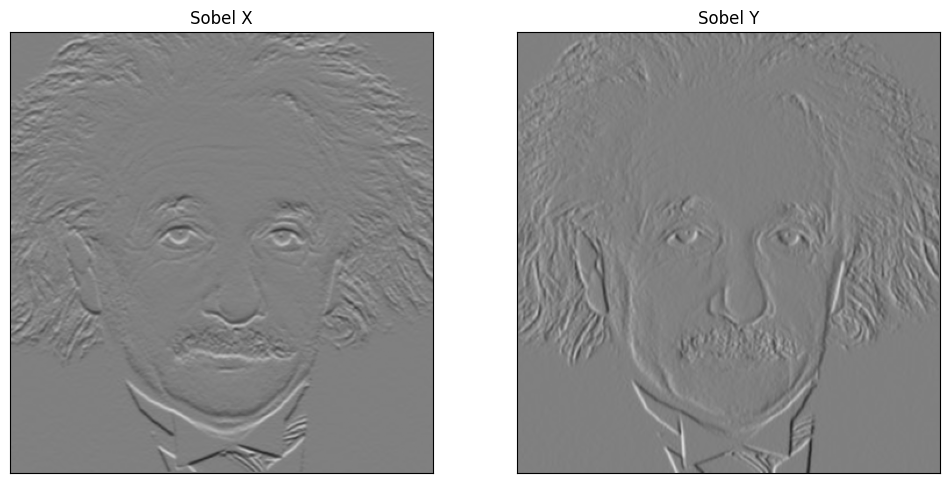

In [79]:
# (b) 
import cv2 as cv 
import numpy as np 
 
img = cv.imread("einstein.png") 
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY).astype(float) 
x_edge = cv.Sobel(img,cv.CV_64F,1,0,ksize=3) 
y_edge = cv.Sobel(img,cv.CV_64F,0,1,ksize=3) 
edge = np.sqrt(x_edge**2+y_edge**2) 
 
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,12))
axes[0].imshow(y_edge, cmap='gray', vmin=-1020, vmax=1020), axes[0].set_title('Sobel X')
axes[1].imshow(x_edge, cmap='gray', vmin=-1020, vmax=1020), axes[1].set_title('Sobel Y'), axes[1].set_xticks([]), axes[1].set_yticks([]) 

plt.show() 

(c)

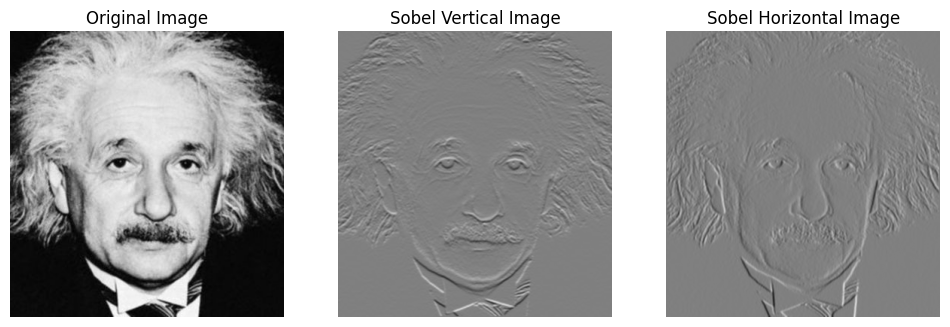

In [84]:
# (c)

import cv2 as cv 
import numpy as np 

im = cv.imread("einstein.png") 
im = cv.cvtColor(im,cv.COLOR_BGR2GRAY).astype(float) 
sobel_h_kernel = np.array([1,2,1], dtype=np.float32) 
sobel_v_kernel = np.array([1,0,-1], dtype=np.float32) 
im1 = cv.sepFilter2D(im, -1, sobel_h_kernel, sobel_v_kernel) 
im2 = cv.sepFilter2D(im, -1, sobel_v_kernel, sobel_h_kernel) 
 
fig, ax = plt.subplots(1,3, figsize=(12,12)) 
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255), ax[0].set_title("Original Image"), ax[0].axis("off")
ax[1].imshow(im1, cmap='gray', vmin=-1020, vmax=1020), ax[1].set_title("Sobel Vertical Image"), ax[1].axis("off")
ax[2].imshow(im2, cmap='gray', vmin=-1020, vmax=1020), ax[2].set_title("Sobel Horizontal Image"), ax[2].axis("off")
plt.show() 


Question 8

Nearest-neighbor normalized SSD: 136.26904899691357
Bilinear interpolation normalized SSD: 115.0919012024177


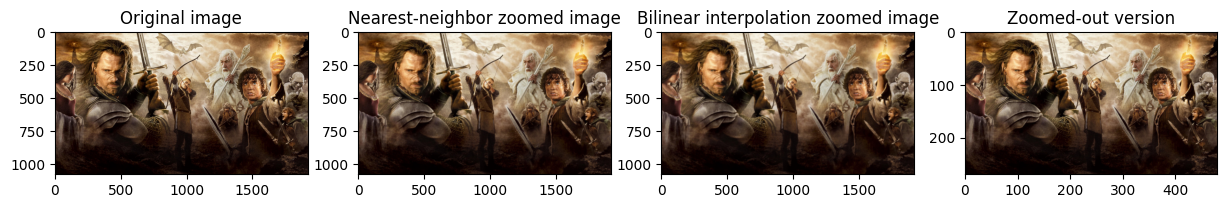

In [97]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread("im01.png")	
small_img1 = cv.imread("im01small.png")

near_img = cv.resize(small_img1, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)
bilinear_img = cv.resize(small_img1, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)

# SSD between the original and zoomed-up images
ssd_nearest = (np.sum((img1.astype("float") - near_img.astype("float")) ** 2)) / img1.size 
ssd_bilinear = (np.sum((img1.astype("float") - bilinear_img.astype("float")) ** 2)) / img1.size 

print(f"Nearest-neighbor normalized sum of squared difference SSD: {ssd_nearest}")
print(f"Bilinear interpolation normalized sum of squared difference SSD: {ssd_bilinear}")

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")

ax[1].imshow(cv.cvtColor(near_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Nearest-neighbor zoomed image")

ax[2].imshow(cv.cvtColor(bilinear_img, cv.COLOR_BGR2RGB))
ax[2].set_title("Bilinear interpolation zoomed image")

ax[3].imshow(cv.cvtColor(small_img1, cv.COLOR_BGR2RGB))
ax[3].set_title("Zoomed-out version")
    
plt.show()

Nearest-neighbor normalized sum of squared difference SSD: 26.446087384259258
Bilinear interpolation normalized sum of squared difference SSD: 18.34591767939815


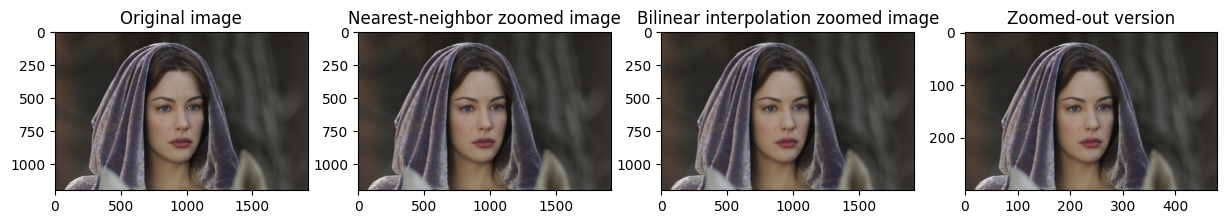

In [99]:
img2 = cv.imread("im02.png")	
small_img2 = cv.imread("im02small.png")

near_img2 = cv.resize(small_img2, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)
bilinear_img2 = cv.resize(small_img2, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)

# SSD between the original and zoomed-up images
ssd_nearest = (np.sum((img2.astype("float") - near_img2.astype("float")) ** 2)) / img2.size 
ssd_bilinear = (np.sum((img2.astype("float") - bilinear_img2.astype("float")) ** 2)) / img2.size 

print(f"Nearest-neighbor normalized sum of squared difference SSD: {ssd_nearest}")
print(f"Bilinear interpolation normalized sum of squared difference SSD: {ssd_bilinear}")

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
ax[0].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")

ax[1].imshow(cv.cvtColor(near_img2, cv.COLOR_BGR2RGB))
ax[1].set_title("Nearest-neighbor zoomed image")

ax[2].imshow(cv.cvtColor(bilinear_img2, cv.COLOR_BGR2RGB))
ax[2].set_title("Bilinear interpolation zoomed image")

ax[3].imshow(cv.cvtColor(small_img2, cv.COLOR_BGR2RGB))
ax[3].set_title("Zoomed-out version")
    
plt.show()

Question 9

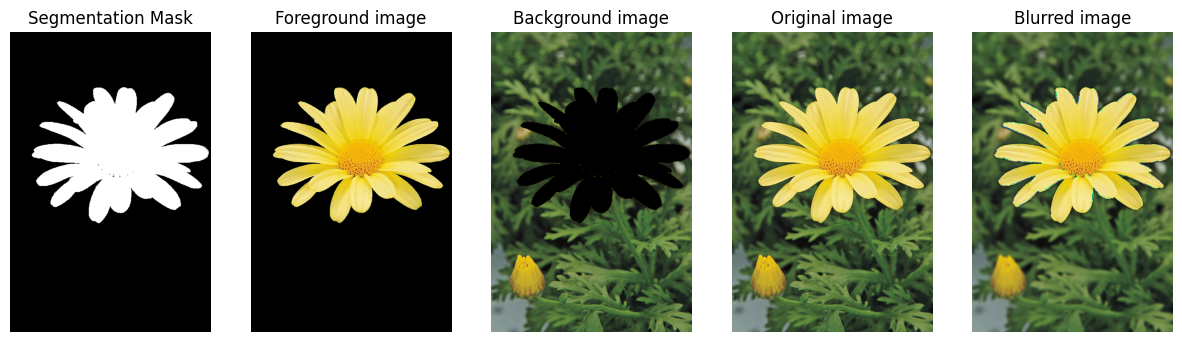

In [101]:
# (a) 
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 

img = cv.imread("daisy.jpg") 
mask = np.zeros(img.shape[:2], np.uint8) 

background_model = np.zeros((1,65), np.float64) 
foreground_model = np.zeros((1,65), np.float64) 

rectangle = (50,50,505,505) 

cv.grabCut(img, mask, rectangle, background_model,foreground_model, 5, cv.GC_INIT_WITH_RECT) 
mask1 = np.where((mask==2)|(mask==0),0,1).astype('uint8') 
img1 = img*mask1[:,:,np.newaxis] 

fig, ax = plt.subplots(1,5, figsize = (15,15)) 
ax[0].imshow(mask1, cmap='gray'), ax[0].set_title("Segmentation Mask"), ax[0].axis("off") 
ax[1].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), ax[1].set_title("Foreground image"), ax[1].axis("off")

cv.grabCut(img, mask, rectangle, background_model,foreground_model, 5, cv.GC_INIT_WITH_RECT) 
mask2 = np.where((mask==3)|(mask==1),0,1).astype('uint8') 
img2 = img*mask2[:,:,np.newaxis] 

ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)), ax[2].set_title("Background image"), ax[2].axis("off")
ax[3].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), ax[3].set_title("Original image"), ax[3].axis("off")

#(b) 
blurred_img = img1 + cv.GaussianBlur(img2,(15,15),0) 
ax[4].imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB)), ax[4].set_title("Blurred image"), ax[4].axis("off")
plt.show()

(c) Some background pixels close to the flower may still get classified as part of the background and become blurred, causing a darker pixel range there.